<a href="https://colab.research.google.com/github/samp3209/MachineLearning/blob/main/MLFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports


In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [26]:
df = pd.read_csv('property.csv')
Y = df['BuildingValue']


# Data Fixing

In [16]:
#Shrinking the pnd column to have smallest amount of unique values
df['PrimaryNeighborhoodDescription'].unique()
pndlist = []
for i in df['PrimaryNeighborhoodDescription']:
  if i == 'south end':
    pndlist.append('SO.END')
  elif i == 'southern end':
    pndlist.append('south end')
  elif i == 'NEW NO END':
    pndlist.append('new north end')
  elif i == 'SO HILL SECT':
    pndlist.append('southern hill')
  elif i == 'DOWNTOWN':
    pndlist.append('downtown')
  elif i == 'UNIV HILL':
    pndlist.append('UVM hill area')
  elif i == 'OLD NO END':
    pndlist.append('old north end')
  else:
    pndlist.append(i)

df['PrimaryNeighborhoodDescription'] = pndlist
df['PrimaryNeighborhoodDescription'].unique()

array(['new north end', 'INTERVALE', 'old north end', 'NRTH AVE EXT',
       'NNE MIDRANGE', 'NNE WATERVIEW', 'NNE Small Complex',
       'NNE BASE COMPLEX', 'waterfront', 'Starr Farm Beach', '0',
       'WATERFRONT', 'lakeview tr', 'DWT SMALL COMPLEX', 'northern hill',
       'RIVERSIDE AV', 'NORTH ST', 'DWT WATERVIEW', 'DWT MIDRANGE',
       'DWT BASE COMPLEX', 'CBD', 'DOWNTN APTS', 'HILL APTS',
       'CHURCH ST MK', 'downtown', 'southern hill', 'UVM hill area',
       'UVM CAMPUS', 'SO.END', 'south end', 'DWT MID LEVEL',
       'SE SAMLL COMPLEX', 'SE MIDRANGE', 'INDUSTRIAL P', 'SHELBURNE ST',
       'DWT HIGH END', 'SE WATERFRONT', 'SE BASE COMPLEX', 'SE HIGN END',
       'DWT MED/HIGH END', 'RCO ZONE', 'EAST AVENUE'], dtype=object)

In [15]:
#Fixing LastSaleDate and StoryHeight Columns
#df.dtypes
df['YearBuilt'] = df['YearBuilt'].fillna(0).astype(int)
df['LastSaleDate'] = pd.to_datetime(df['LastSaleDate'])
df.dtypes
#df['StoryHeight'].unique()
story = []

for i in df['StoryHeight']:

  if i == 'Two Sty':
    story.append('2')
    
  elif i== 'One Sty':
    story.append('1')
    
  elif i == 'Three Sty':
    story.append('3')
    
  elif i == 'Four Sty':
    story.append('4')
    
  elif i == 'Five Sty':
    story.append('5')
    
  elif i == 'Six Sty':
    story.append('6')
    
  elif i == '9 Story':
    story.append('9')
  
  elif i == '4 story':
    story.append('4')
    
  elif i == '4 Story':
    story.append('4')
   
  elif i == '7 Story':
    story.append('7')
    
  elif i == '6 Story':
    story.append('6')
    
  elif i == '5 Stories':
    story.append('5')
   
  elif i == '8 Story':
    story.append('8')
    
  else:
      story.append(i)
df['StoryHeight'] = story
df['StoryHeight'] = df['StoryHeight'].astype(float)
df['StoryHeight']
#story

0        1.50
1         NaN
2        1.50
3        2.00
4        1.75
         ... 
11403    1.00
11404    1.00
11405    1.00
11406    4.00
11407    1.00
Name: StoryHeight, Length: 11408, dtype: float64

In [21]:
#fixing number columns to remove unneccessary characters
df['BuildingValue'] = df['BuildingValue'].astype(str)
df['BuildingValue'] = df['BuildingValue'].str.replace(',','')
df['BuildingValue'] = df['BuildingValue'].str.replace('$','')
df['BuildingValue'] = df['BuildingValue'].astype(float)
######
df['LandValue'] = df['LandValue'].astype(str)
df['LandValue'] = df['LandValue'].str.replace(',','')
df['LandValue'] = df['LandValue'].str.replace('$','')
df['LandValue'] = df['LandValue'].astype(float)
######

########
df['LastSaleAmount'] = df['LastSaleAmount'].astype(str)
df['LastSaleAmount'] = df['LastSaleAmount'].str.replace(',','')
df['LastSaleAmount'] = df['LastSaleAmount'].str.replace('$','')
df['LastSaleAmount'] = df['LastSaleAmount'].astype(float)
########
#square feet removal
########
df['LotSqFeet'] = df['LotSqFeet'].astype(str)
df['LotSqFeet'] = df['LotSqFeet'].str.replace(' sqft','')
df['LotSqFeet'] = df['LotSqFeet'].str.replace(',','')
df['LotSqFeet'] = df['LotSqFeet'].astype(int)
#########
df['BuildingGrossAreaSF'] = df['BuildingGrossAreaSF'].astype(str)
df['BuildingGrossAreaSF'] = df['BuildingGrossAreaSF'].str.replace(' sqft','')
df['BuildingGrossAreaSF'] = df['BuildingGrossAreaSF'].str.replace(',','')
df['BuildingGrossAreaSF'] = df['BuildingGrossAreaSF'].astype(int)
#########
#########
df['BuildingFinishedSf'] = df['BuildingFinishedSf'].astype(str)
df['BuildingFinishedSf'] = df['BuildingFinishedSf'].str.replace(' sqft','')
df['BuildingFinishedSf'] = df['BuildingFinishedSf'].str.replace(',','')
df['BuildingFinishedSf'] = df['BuildingFinishedSf'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app.launch_new_instance()


In [22]:
#Adding numeric scale to physical condition
#print(df['PhysicalCondition'].unique())
nums = []
for i in df['PhysicalCondition']:
  if i == 'Fair':
    nums.append(1)
  elif i == 'Fair-Avg':
    nums.append(2)
  elif i == 'Average':
    nums.append(3)
  elif i == 'Avg-Good':
    nums.append(4)
  elif i == 'Good':
    nums.append(5)
  elif i == 'Good-VG':
    nums.append(6)
  else:
    nums.append(7)
df['PhysicalCondition'] = nums
df['PhysicalCondition'] = df['PhysicalCondition'].astype(int)
df['PhysicalCondition'].sample(20)

3347    3
9407    3
8224    6
7236    3
6659    7
4300    3
1522    5
6545    3
745     3
1682    3
9593    3
894     3
4123    3
1042    3
1423    7
4337    3
7319    3
6903    3
1103    3
1497    1
Name: PhysicalCondition, dtype: int64

In [25]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
quantitative

['PropertyId',
 'LastSaleDate',
 'LastSaleAmount',
 'LotSqFeet',
 'BuildingValue',
 'LandValue',
 'BuildingNo',
 'YearBuilt',
 'StoryHeight',
 'BuildingGrossAreaSF',
 'BuildingFinishedSf',
 'TotalRooms',
 'Bedrooms',
 'FullBaths',
 'HalfBaths',
 'ResidentialUnits',
 'CommercialUnits',
 'PhysicalCondition',
 'DepreciationPct']

#Data Exploration

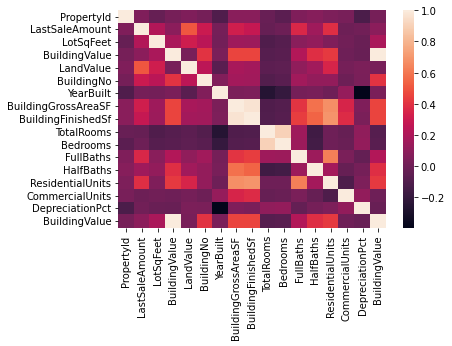

In [11]:
corr = df[quantitative+['BuildingValue']].corr()
sns.heatmap(corr)